In [1]:
import json
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
req_string = "http://mapotic.com/api/v1/maps/3413/pois/{}/motion/with-meta/?format=json"

In [3]:
db_string = "http://mapotic.com/api/v1/maps/3413/pois.geojson/?format=json"

req = urllib.request.Request(db_string,
data=None, headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    })

response = urllib.request.urlopen(req)

json_data = json.loads(response.read())

In [4]:
count = 0

ids = []

for item in json_data['features']:
    # Check if 'White Shark' is in the name of the species
    if item['properties']['species'] is not None and 'White Shark' in item['properties']['species']:
        count += 1

        # append the id to the list
        ids.append(item['properties']['id'])

print(f'Number of Sharks: {count}')

Number of Sharks: 116


In [5]:
lats = []
longs = []
times = []

# Get the data for every Shark
for id in ids:
    req = urllib.request.Request(req_string.format(id),
    data=None, headers={
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
        })

    response = urllib.request.urlopen(req)

    json_data = json.loads(response.read())

    point_objs = json_data['motion']

    for obj in point_objs:
        coord = obj['point']['coordinates']
        times.append(obj['dt_move'])
        lats.append(coord[0])
        longs.append(coord[1])

    count += 1

df = pd.DataFrame()

df['lat'] = lats
df['long'] = longs
df['time'] = times
df['time'] = pd.to_datetime(df['time'])

In [6]:
df.to_csv('white_shark_data.csv', index=False)

In [7]:
df

,lat,long,time
0,-69.870987,41.472284,2016-09-21 21:32:12+00:00
1,-69.790700,41.317290,2016-09-23 02:38:57+00:00
2,-69.888611,41.415955,2016-09-23 10:05:08+00:00
3,-69.842810,41.208020,2016-09-30 22:50:45+00:00
4,-69.834670,41.212120,2016-09-30 23:43:10+00:00
...,...,...,...
37448,-79.597050,32.443430,2022-04-05 15:20:10+00:00
37449,-79.426260,32.438510,2022-04-06 12:51:03+00:00
37450,-79.421700,32.435100,2022-04-06 16:52:54+00:00
37451,-79.345920,32.661230,2022-04-07 00:40:03+00:00


In [8]:
df['month'] = df['time'].dt.month
#df.head()

americas = df.loc[df['lat'] < 0]

africa = df.loc[df['lat'] > 0]

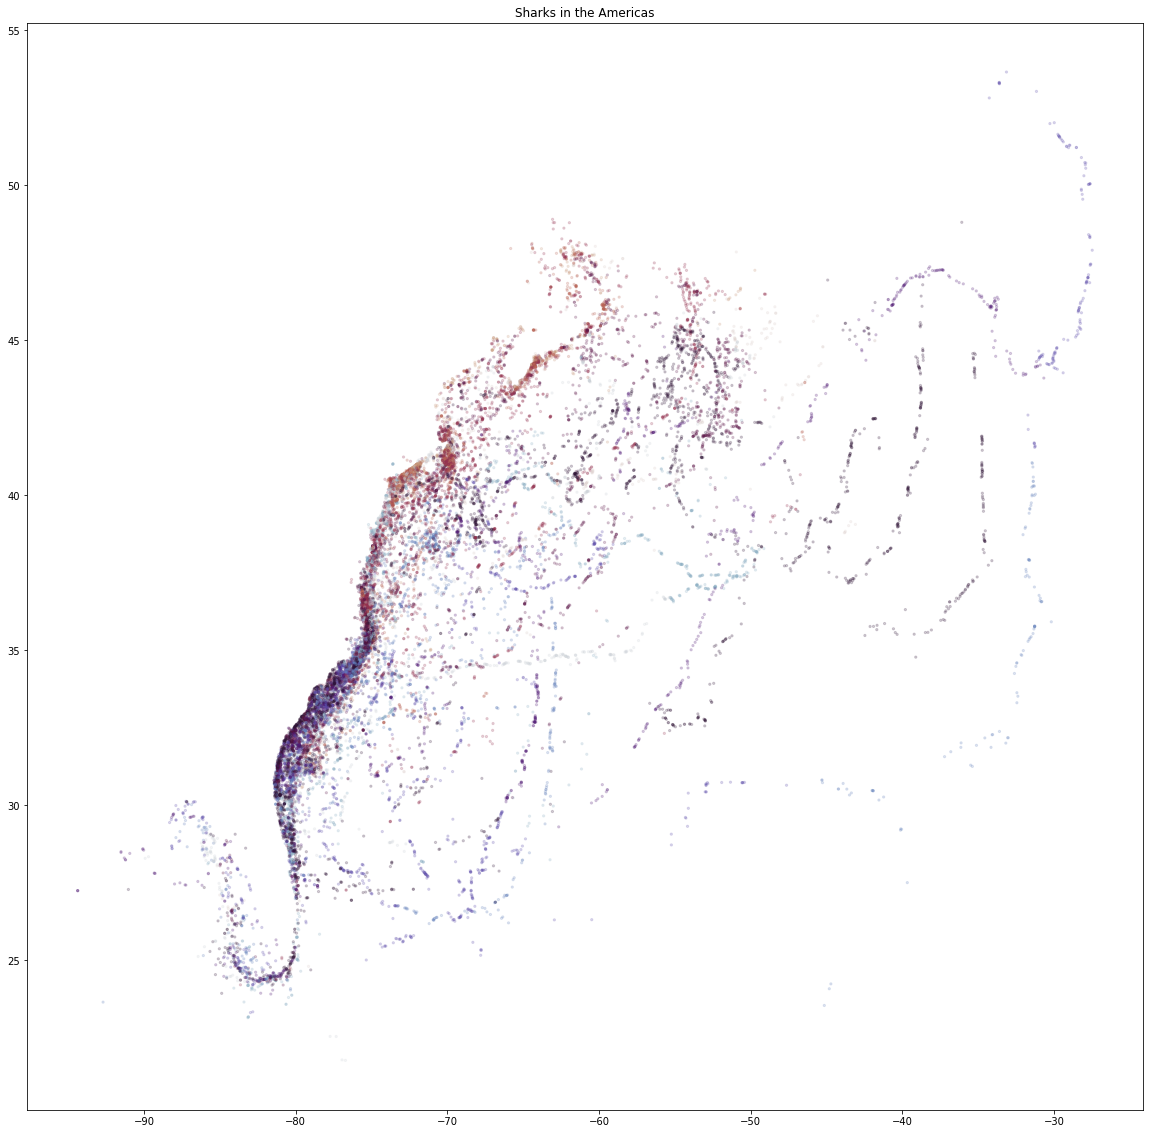

In [9]:
plt.scatter(americas['lat'], americas['long'], c=americas['month'], cmap='twilight_shifted', alpha=0.2, s=5)
plt.gcf().set_size_inches(20, 20)
plt.title('Sharks in the Americas')
plt.show()

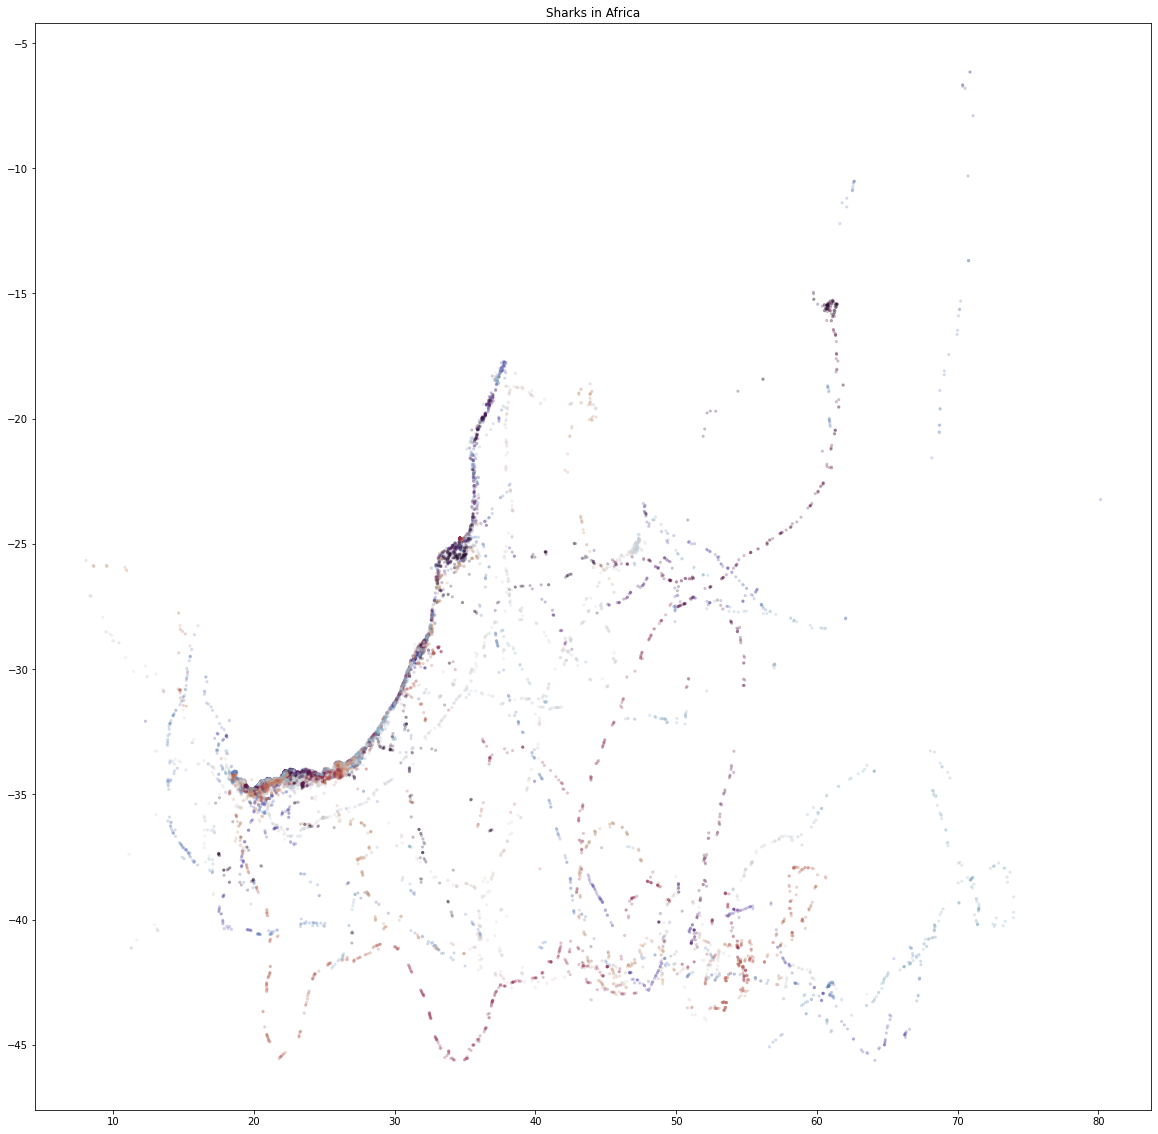

In [10]:
plt.scatter(africa['lat'], africa['long'], c=africa['month'], cmap='twilight_shifted', alpha=0.2, s=5)
plt.gcf().set_size_inches(20, 20)
plt.title('Sharks in Africa')
plt.show()

In [30]:
import sklearn
import sys
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.preprocessing import MultiLabelBinarizer

#train, test = tts(americas, test_size=0.2)

tree = dt(random_state=42)
lr_model = lr(random_state=42)

americas['coord'] = americas[['lat', 'long']].apply(tuple, axis=1)

print("Processing...")

coords = MultiLabelBinarizer().fit_transform(americas['coord'])

print("Training Tree...")

cvs(tree, np.array(americas['month']).reshape(-1,1), coords, cv=5, verbose=1, n_jobs=-1)

print("Training Logistic Regression...")

cvs(lr_model, np.array(americas['month']).reshape(-1,1), coords, cv=5, verbose=1, n_jobs=-1)


<ipython-input-30-f2c0064291b5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  americas['coord'] = americas[['lat', 'long']].apply(tuple, axis=1)


Processing...
Training...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  6.7min finished


array([0., 0., 0.])